This article uses the Python3 software packages pandas and matplotlib to analyze and visualize data from high-end hotels in Beijing. It presents an overview of the data and examines the impact of variables such as user ratings, geographical location, room types, and surrounding amenities on hotel prices. The data was sourced from the Heywhale community and can be found at https://www.heywhale.com/mw/dataset/5e7302fbc59d6100362268f1/content.

Table of contents:
I. Preparation

Importing packages and datasets
Observing and cleaning data, proposing questions
II. Data analysis and visualization
Number of hotels at different price levels
Relationship between three room types and prices
Relationship between regions and prices
3.1 Number of high-end hotels in each district
3.2 Box plot of prices in different regions
3.3 Geographic distribution
Relationship between user ratings, decoration time, surrounding amenities, and prices
4.1 Relationship between prices and ratings
4.2 Relationship between prices and decoration time
4.3 Relationship between prices and surrounding amenities
Correlation coefficients between different variables.

I. Preparation
Importing packages and datasets.

In [1]:
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
df = pd.read_csv('hoteldatabeijing2.csv')

2. Observing and cleaning data, proposing questions
Viewing table information:

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hotel name             556 non-null    object 
 1   area                   556 non-null    object 
 2   address                556 non-null    object 
 3   health score           556 non-null    float64
 4   service score          556 non-null    float64
 5   Facility Rating        556 non-null    float64
 6   position score         556 non-null    float64
 7   Number of evaluations  556 non-null    int64  
 8   renovation time        556 non-null    int64  
 9   Room type              556 non-null    object 
 10  price                  556 non-null    int64  
 11  longitude              556 non-null    float64
 12  latitude               556 non-null    float64
 13  company                556 non-null    int64  
 14  accommodation          556 non-null    int64  
 15  school

,health score,service score,Facility Rating,position score,Number of evaluations,renovation time,price,longitude,latitude,company,accommodation,school life
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,4.611691,4.530036,4.459173,4.366187,210.152878,2010.926259,1655.512590,116.424862,39.982006,28.028777,93.267986,20.796763
std,0.167300,0.194928,0.192860,0.223503,118.174829,3.537184,1130.462335,0.157595,0.140870,27.931110,75.698204,26.168409
min,3.900000,3.800000,3.700000,3.600000,1.000000,1997.000000,320.000000,115.820753,39.639004,0.000000,0.000000,0.000000
25%,4.600000,4.400000,4.400000,4.200000,125.000000,2008.000000,950.250000,116.359671,39.916074,4.750000,16.750000,3.000000
50%,4.600000,4.600000,4.500000,4.400000,209.500000,2012.000000,1389.500000,116.421904,39.942446,22.000000,99.000000,14.500000
75%,4.700000,4.700000,4.600000,4.500000,293.500000,2014.000000,2002.000000,116.467336,39.991338,40.000000,141.250000,28.000000
max,5.000000,5.000000,4.800000,4.800000,569.000000,2017.000000,9970.000000,117.275221,40.651817,126.000000,255.000000,160.000000


According to the table header, there are a total of 16 variables in the data, including hotel name, region, address, cleanliness rating, service rating, facility rating, location rating, number of ratings, decoration time, room type, price, longitude, latitude, company, travel and accommodation, and campus life.

There are a total of 556 data entries, and there is no missing data. However, the data for the last three variables are somewhat abnormal, with a minimum value of 0, and the mean value is much larger than the median, indicating severe left skewness. Let's see if this part of the data needs to be cleaned:
df.sort_values('company')

Many records have a value of 0 for the 'company', 'travel and accommodation', and 'campus life' variables, which is probably due to missing data on the website or errors during data scraping.

Let's see how many such records there are:

In [4]:
df.loc[(df['company'] == 0) & (df['accommodation'] == 0) & (df['school life'] == 0)]

,Hotel name,area,address,health score,service score,Facility Rating,position score,Number of evaluations,renovation time,Room type,price,longitude,latitude,company,accommodation,school life
0,Beijing Langlizi Xishan Garden Hotel,Haidian District,800 meters south of the intersection of Yongfe...,4.8,4.8,4.7,4.4,143,2014,Deluxe suite,9970,116.292419,40.095804,0,0,0
9,Beijing Yanqi Hotel,other urban areas,Huairou Yanqi Lake Yanqi Island,4.8,4.7,4.6,4.4,81,2014,Deluxe suite,5190,116.683518,40.404419,0,0,0
21,Sunrise Kempinski Hotel Beijing,other urban areas,"No. 18, Yanshui Road, Yanqi Lake, Huairou",4.8,4.7,4.6,4.5,139,2015,Deluxe suite,4020,116.685097,40.392881,0,0,0
28,Beijing Langlizi Xishan Garden Hotel,Haidian District,800 meters south of the intersection of Yongfe...,4.8,4.8,4.7,4.4,143,2014,standard room,3657,116.292419,40.095804,0,0,0
29,Beijing Yanqi Hotel,other urban areas,Huairou Yanqi Lake Yanqi Island,4.8,4.7,4.6,4.4,81,2014,business room,3630,116.683518,40.404419,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,Beijing Macrolink Lijing Hot Spring Hotel,other urban areas,"No. 111, Xuanzhuang Huzhong Street, Lisui Town...",4.6,4.6,4.4,4.1,10,2015,standard room,375,116.769465,40.130551,0,0,0
552,Beijing Sunshine International Conference Center,other urban areas,"No. 1 South of Rulin Village, Xiji Town, Tongzhou",4.2,3.9,3.9,3.9,55,2013,standard room,375,116.798816,39.815461,0,0,0
553,Beijing Jinbao Garden Hotel,other urban areas,"Jinbao Garden, North Shun'an Road, Mapo, Shunyi",4.3,4.2,4.1,4.1,109,2015,standard room,373,116.667044,40.178839,0,0,0
554,Beijing Longwan International Camping Park,other urban areas,"200 meters south of Donglongwan Village, Jiuxi...",4.7,4.5,4.3,4.3,120,2014,standard room,332,116.093857,40.556283,0,0,0


There are a total of 556 records, and there are no missing data, but the data in the last three variables are abnormal, with a minimum value of 0. The mean is much greater than the median, indicating severe left skewness in the data. Check whether this part of the data needs to be cleaned.

In [5]:
df.sort_values('company')

,Hotel name,area,address,health score,service score,Facility Rating,position score,Number of evaluations,renovation time,Room type,price,longitude,latitude,company,accommodation,school life
0,Beijing Langlizi Xishan Garden Hotel,Haidian District,800 meters south of the intersection of Yongfe...,4.8,4.8,4.7,4.4,143,2014,Deluxe suite,9970,116.292419,40.095804,0,0,0
286,Beijing Heyuanjingyi Hotel,other urban areas,"District 2, Courtyard No. 57, Bianhe Road, Hou...",4.6,4.4,4.3,4.2,135,2008,business room,1370,116.492409,40.089266,0,0,0
287,Beijing Riverside Hotel,other urban areas,"No. 15, Fengtai Shooting Range Road",4.7,4.6,4.6,4.4,149,2013,Deluxe suite,1359,116.176544,39.882320,0,0,0
289,Beijing Longcheng Palace International Hotel,other urban areas,Changping Road 317,4.6,4.4,4.4,4.3,187,2002,business room,1345,116.309825,40.092441,0,0,0
314,Beijing Oriental MGM International Hotel,other urban areas,"No. 2 Wenlin North Street, Fengtai",4.6,4.6,4.4,4.1,35,2015,Deluxe suite,1258,116.099392,39.816910,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,Beijing International Trade Hotel,Chaoyang District,"No. 1 Jianguomenwai Street, Chaoyang",4.8,4.8,4.7,4.7,228,2010,Deluxe suite,4503,116.464285,39.915168,114,209,14
221,Beijing China World Hotel,Chaoyang District,"No. 1 Jianguomenwai Street, Chaoyang",4.8,4.7,4.7,4.6,274,2015,standard room,1622,116.464285,39.915168,114,209,14
164,Beijing Reignwood Fairmont Hotel,Chaoyang District,"No. 8 Yong'an Dongli, Jianguomenwai Street, Ch...",4.6,4.6,4.5,4.4,247,2010,business room,1855,116.458283,39.911801,126,220,16
278,Beijing Reignwood Fairmont Hotel,Chaoyang District,"No. 8 Yong'an Dongli, Jianguomenwai Street, Ch...",4.6,4.6,4.5,4.4,247,2010,standard room,1389,116.458283,39.911801,126,220,16


Many records have a value of 0 for the 'company', 'travel and accommodation', and 'campus life' variables, which is probably due to missing data on the website or errors during data scraping.

Let's see how many records have a value of 0 for these variables:

In [6]:
df.loc[(df['company'] == 0) & (df['accommodation'] == 0) & (df['school life'] == 0)]

,Hotel name,area,address,health score,service score,Facility Rating,position score,Number of evaluations,renovation time,Room type,price,longitude,latitude,company,accommodation,school life
0,Beijing Langlizi Xishan Garden Hotel,Haidian District,800 meters south of the intersection of Yongfe...,4.8,4.8,4.7,4.4,143,2014,Deluxe suite,9970,116.292419,40.095804,0,0,0
9,Beijing Yanqi Hotel,other urban areas,Huairou Yanqi Lake Yanqi Island,4.8,4.7,4.6,4.4,81,2014,Deluxe suite,5190,116.683518,40.404419,0,0,0
21,Sunrise Kempinski Hotel Beijing,other urban areas,"No. 18, Yanshui Road, Yanqi Lake, Huairou",4.8,4.7,4.6,4.5,139,2015,Deluxe suite,4020,116.685097,40.392881,0,0,0
28,Beijing Langlizi Xishan Garden Hotel,Haidian District,800 meters south of the intersection of Yongfe...,4.8,4.8,4.7,4.4,143,2014,standard room,3657,116.292419,40.095804,0,0,0
29,Beijing Yanqi Hotel,other urban areas,Huairou Yanqi Lake Yanqi Island,4.8,4.7,4.6,4.4,81,2014,business room,3630,116.683518,40.404419,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,Beijing Macrolink Lijing Hot Spring Hotel,other urban areas,"No. 111, Xuanzhuang Huzhong Street, Lisui Town...",4.6,4.6,4.4,4.1,10,2015,standard room,375,116.769465,40.130551,0,0,0
552,Beijing Sunshine International Conference Center,other urban areas,"No. 1 South of Rulin Village, Xiji Town, Tongzhou",4.2,3.9,3.9,3.9,55,2013,standard room,375,116.798816,39.815461,0,0,0
553,Beijing Jinbao Garden Hotel,other urban areas,"Jinbao Garden, North Shun'an Road, Mapo, Shunyi",4.3,4.2,4.1,4.1,109,2015,standard room,373,116.667044,40.178839,0,0,0
554,Beijing Longwan International Camping Park,other urban areas,"200 meters south of Donglongwan Village, Jiuxi...",4.7,4.5,4.3,4.3,120,2014,standard room,332,116.093857,40.556283,0,0,0


There are 105 such records, which accounts for about 20% of the total data. Therefore, we will not clean them for now. We will handle them if necessary when dealing with specific problems.

Based on the initial observations, my plan is to first count the number of high-end hotels at each price level to obtain an overview. Then, I will explore the relationships between variables such as address, rating, room type, surrounding amenities, and prices separately, as prices are closely related to the factors that influence them. I will also use a coordinate map to visualize the distribution of high-end hotels in Beijing, to help viewers understand the overall situation in the industry.

II. Data Analysis and Visualisation.

1. Number of hotels at different price levels.

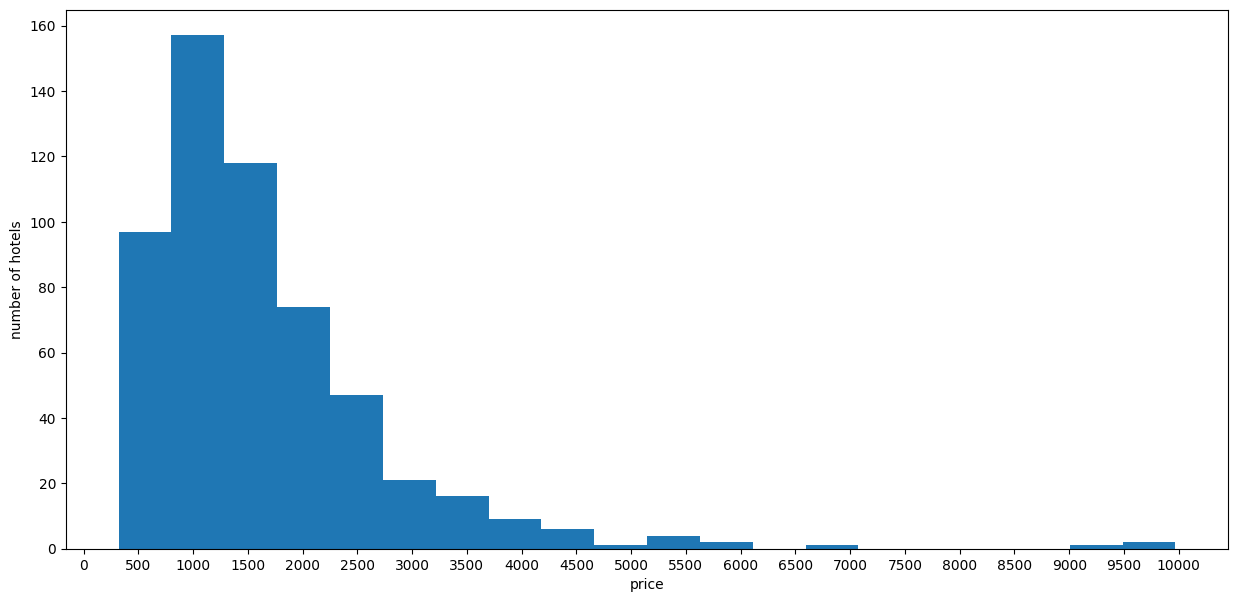

In [7]:
price = df['price']
ax = plt.figure('hist',figsize=(15,7))
n,bins,patches = plt.hist(price,bins = 20)
plt.xlabel('price')
plt.ylabel('number of hotels')
x_major_locator=MultipleLocator(500)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

There are 556 high-end hotels, and the prices are mainly between 400-2500 yuan.

2. The relationship between room type
and price First check how many room
types there are:

In [8]:
print(df['Room type'].unique())

['Deluxe suite' 'business room' 'standard room']


There are three types.


Draw a box plot of the price distribution of different room
types:

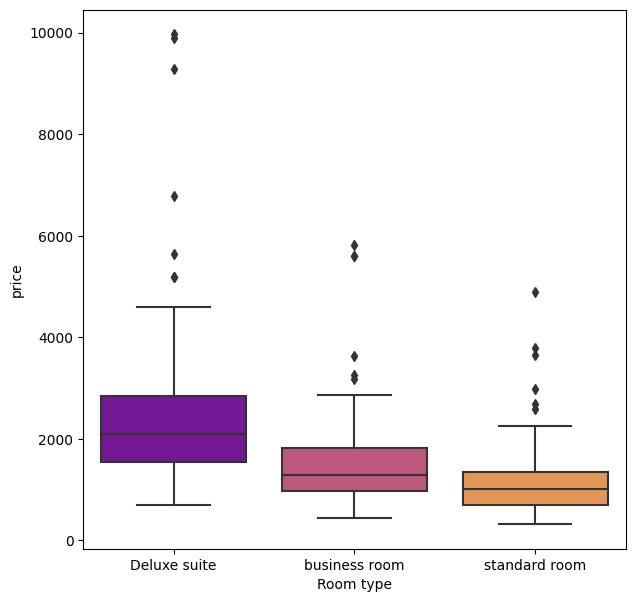

In [9]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Room type',y='price',data=df,palette='plasma')
plt.show()

Extremum value, median value, and four scores are all in the order of luxury suite > business room > standard room.

3.  The relationship between
regions and house prices 

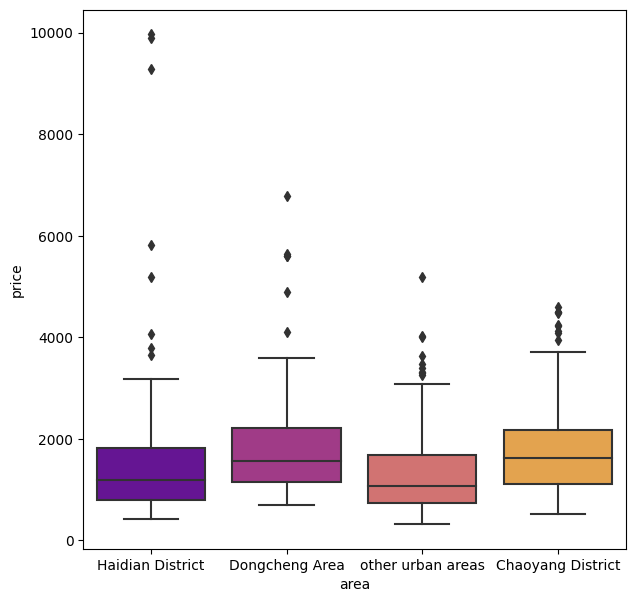

In [10]:
plt.figure(figsize=(7,7))
sns.boxplot(x='area',y='price',data=df,palette='plasma')
plt.show()

According to the analysis in the previous step, there are not many high-end hotels in Huairou, but the prices are higher than those in other districts, which
is worth noting.
The hotels with the highest room rates are concentrated in Haidian District, but the lowest value also appears in Haidian District. It can be inferred that
Haidian District, as a major urban area, can provide rich and diverse hotel choices.
After consulting the information, I found that Huairou is an outlying county of Beijing, with many beautiful scenery, attracting many people as a tourist
destination, which can explain the reason for the high hotel prices in this area.

3.1 Geographic
distribution The distribution of high-end
hotels in each district

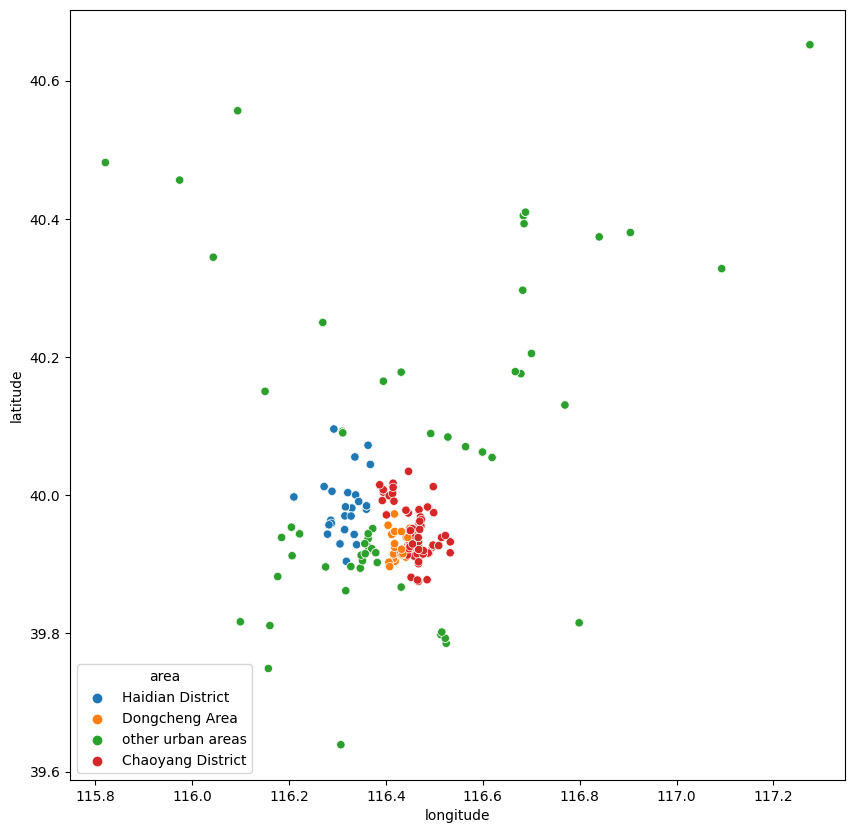

In [11]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df['area'])
plt.show()

Mark prices in different colors: 

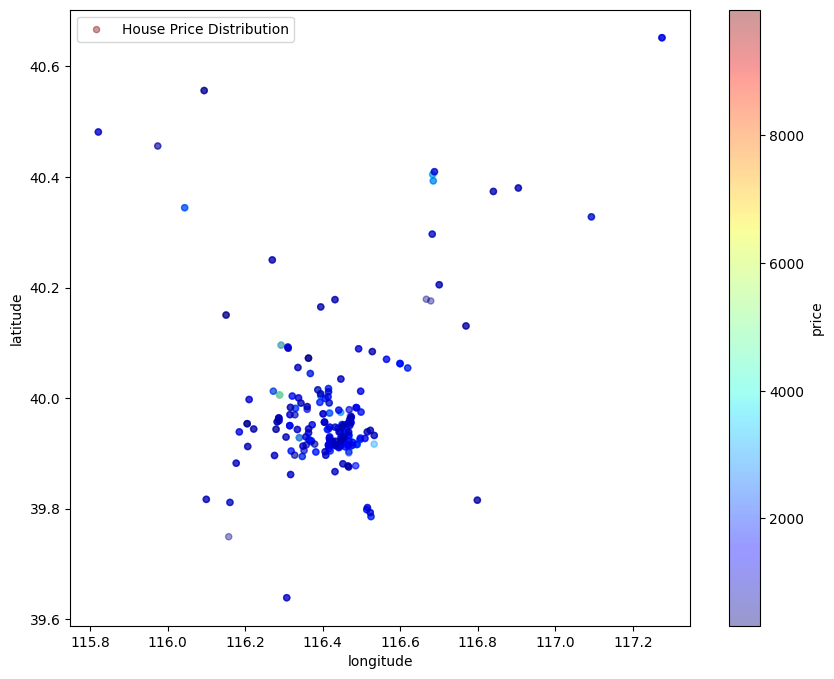

In [12]:
vision=df.plot(kind='scatter', x='longitude', y='latitude', label='House Price Distribution', c='price',
 cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
vision.legend()
plt.show()

4. The relationship between netizen ratings, renovation time, surrounding life,
and housing prices First, the four items of 'health score', 'service score', 'facility rating', and 'position score' are summarized
into a new column 'total rating' ; Sum 'company', 'accommodation', 'school life'
into a new column: 'surrounding activities':

4.1 Distribution of
housing prices
with ratings x = 

In [13]:
df['total rating']=df.iloc[:,3:7].sum(axis=1)
df['surrounding activities']=df.iloc[:,14:16].sum(axis=1)

C:\Users\nicol\AppData\Local\Temp\ipykernel_39332\1107625842.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found be

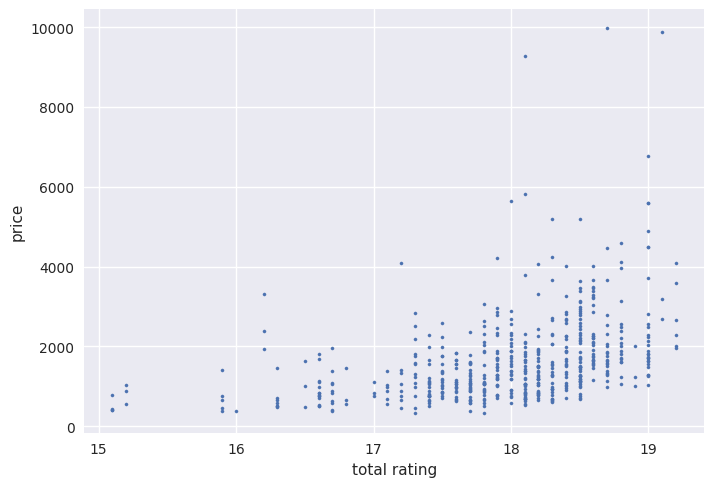

In [14]:
x = df['total rating']
y = df['price']
plt.style.use('seaborn')
fig,ax = plt.subplots()
ax.scatter(x,y,s=5)
plt.xlabel('total rating')
plt.ylabel('price')
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.show()

As the total score increases, it can be seen that the minimum value of the house price has increased, but there is no obvious correlation,
but the house price exceeds 5,000 yuan, and the score is above 18

4.2 Distribution of housing prices with
renovation time x = 

C:\Users\nicol\AppData\Local\Temp\ipykernel_39332\2126589727.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


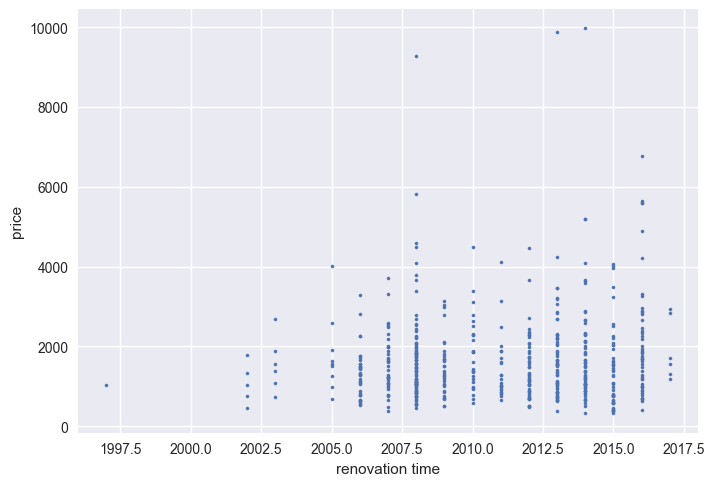

In [15]:
x = df['renovation time']
y = df['price']
plt.style.use('seaborn')
fig,ax = plt.subplots()
ax.scatter(x,y,s=5)
plt.xlabel('renovation time')
plt.ylabel('price')
plt.show()

The decoration time of most high-end hotels is concentrated after 2005, but there is no obvious correlation with the rooms.